In [1]:
import pandas as pd
import numpy as np

C:\Users\m.glazman\AppData\Local\Temp\ipykernel_25000\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Сначала удалим все вакансии, для которых ключевые навыки не спарсились, они не несут никакой информации

In [2]:
df = pd.read_json('hh_data.json')
df_cleaned = df[df['skills'].apply(lambda x: x != [])]
df_cleaned.shape

(1302, 3)

Таким образом у нас осталось 1302 вакансии Администратора в Москве

In [19]:
df_cleaned.head(20)

,name,salary,skills,cnt_skills
0,Администратор стоматологической клиники,60000.0,"[Грамотная речь, Деловое общение, Работа с орг...",13
2,Администратор компьютерного клуба,36500.0,[Организаторские навыки],1
3,Администратор фитнес-клуба,70000.0,"[Пунктуальность, Обучение и развитие, Фитнес, ...",5
4,Администратор фитнес-клуба,100000.0,"[Грамотная речь, Работа в команде, Навыки прод...",5
6,Администратор в школу танцев,100000.0,"[Грамотная речь, Организаторские навыки, Телеф...",8
7,Администратор по работе с клиентами в школу та...,140000.0,"[B2C продажи, Деловое общение, Развитие продаж...",11
8,Администратор (ЕЖЕНЕДЕЛЬНЫЕ ВЫПЛАТЫ),75000.0,"[Активные продажи, Прямые продажи, Телефонные ...",8
9,Администратор гостиницы,115000.0,"[Работа с жалобами клиентов, Мотивация персона...",7
10,Администратор косметологической клиники,120000.0,"[Коммуникативные навыки, Администрирование, Вн...",5
11,Администратор в стоматологию,117500.0,"[Активные продажи, Деловая переписка, Организа...",4


Как видно з/п указано не в числовом формате (стоит отметить, что какую-то предобработку этого столбца я делал в самом парсинге). Будем считать, что если не указано "на руки" или "после вычета налогов", то это з/п до вычета, а также что если указан интервал з/п, то претендент может рассчитывать на среднюю вилку. Также, чтобы не терять выборку, з/п можно заполнить средним значением, если она не спарсилась (это будет относительно честно, учитывая небольшой разброс з/п администраторов)

In [4]:
df_cleaned['salary'].dtype

dtype('O')

In [5]:
def corrected_salary(salary: str):
    salary = salary.replace(',', '')
    salary_list = list(salary.split(' '))
    ans = 0
    if 'от' in salary_list and 'до' in salary_list:
        l = 0
        r = 0
        cnt_digit = 0
        for i in salary_list:
            if cnt_digit == 2:
                break
            elif cnt_digit == 1:
                if i.isdigit(): 
                    l = i
                    cnt_digit += 1
            else:
                if i.isdigit(): 
                    r = i
                    cnt_digit += 1
        ans = (int(l)+int(r))/2
    else:
        for i in salary_list:
            if i.isdigit():
                ans = int(i)
                break
    if 'на руки' in salary or 'до вычета налогов' in salary: return ans
    else: return ans*0.87

df_cleaned['salary'] = df_cleaned['salary'].map(corrected_salary, na_action='ignore')
df_cleaned.head()

C:\Users\m.glazman\AppData\Local\Temp\ipykernel_25000\3450513244.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['salary'] = df_cleaned['salary'].map(corrected_salary, na_action='ignore')


,name,salary,skills
0,Администратор стоматологической клиники,60000.0,"[Грамотная речь, Деловое общение, Работа с орг..."
2,Администратор компьютерного клуба,36500.0,[Организаторские навыки]
3,Администратор фитнес-клуба,70000.0,"[Пунктуальность, Обучение и развитие, Фитнес, ..."
4,Администратор фитнес-клуба,100000.0,"[Грамотная речь, Работа в команде, Навыки прод..."
6,Администратор в школу танцев,100000.0,"[Грамотная речь, Организаторские навыки, Телеф..."


In [6]:
df_cleaned['salary'].dtype

dtype('float64')

Тепперь з/п представлена в удобном для работы формате, осталось проверить, что нет строк, где salary не спарсилось

In [7]:
df_cleaned.isnull().sum()

name      0
salary    0
skills    0
dtype: int64

Получается, когда мы убрали вакансии, где не спарсились скиллы, вакансий где не спарсилась з/п не осталось

Мне в любом случае пригодится еще один столбец с количество навыков, требуемых в вакансии + есть гипотеза, что чем больше требуется навыков, тем выше указана з/п на вакансии, поэтому ее я создаем еще до визуализаций.

In [8]:
df_cleaned['cnt_skills'] = df_cleaned['skills'].apply(len)
print(f"В среднем в вакансии указано: {np.mean(df_cleaned['cnt_skills'])} ключевых навыков")

В среднем в вакансии указано: 7.6513056835637485 ключевых навыков


C:\Users\m.glazman\AppData\Local\Temp\ipykernel_25000\2606492369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cnt_skills'] = df_cleaned['skills'].apply(len)


Посмотрим, сколько вообще возможных навыков может требоваться для вакансии. Используем для этого One-Hot-Encoding

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

In [10]:
mlb = MultiLabelBinarizer()
df_skills = pd.DataFrame(mlb.fit_transform(df_cleaned['skills']), columns=mlb.classes_, index=df_cleaned.index)

In [11]:
df_encoded = pd.concat([df_cleaned, df_skills], axis=1)
df_encoded.head()

,name,salary,skills,cnt_skills,1C,1C: Бухгалтерия,1C: Предприятие,1С,1С Фитнесс,1С-Битрикс,...,умение работать в команде,умение работать в режиме многозадачности,умение работать в условиях многозадачности,управляющий,фитнесклуб,харизма,хозяйственность,частичная занятость,энергичность,юниверс
0,Администратор стоматологической клиники,60000.0,"[Грамотная речь, Деловое общение, Работа с орг...",13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Администратор компьютерного клуба,36500.0,[Организаторские навыки],1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Администратор фитнес-клуба,70000.0,"[Пунктуальность, Обучение и развитие, Фитнес, ...",5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Администратор фитнес-клуба,100000.0,"[Грамотная речь, Работа в команде, Навыки прод...",5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Администратор в школу танцев,100000.0,"[Грамотная речь, Организаторские навыки, Телеф...",8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Сразу интересно посмотреть на то, для скольких вакансий нужен каждый скилл (составить представление о популярности навыков, т.к. навыков больше, чем я думал). 

In [12]:
skills_dict = {}
#бежим по всем колонкам после колонки cnt_skills (после нее как раз идут конкретные навыки)
for column in df_encoded.columns[4:]:
    cnt = df_encoded[column].sum()
    skills_dict[column] = cnt   

skills_dict = dict(sorted(skills_dict.items(), key = lambda x: x[1], reverse = True))
skills_dict

{'Грамотная речь': 528,
 'Работа в команде': 426,
 'Деловое общение': 401,
 'Пользователь ПК': 373,
 'Организаторские навыки': 295,
 'Телефонные переговоры': 291,
 'Администрирование': 280,
 'Навыки продаж': 238,
 'Навыки межличностного общения': 203,
 'Прием посетителей': 197,
 'Клиентоориентированность': 178,
 'Деловая переписка': 168,
 'Активные продажи': 164,
 'Работа с оргтехникой': 143,
 'Ориентация на клиента': 135,
 'Работа с большим объемом информации': 127,
 'Деловая коммуникация': 122,
 'Обучение и развитие': 108,
 'Грамотность': 101,
 'Кассовые операции': 101,
 'Работа с кассой': 98,
 'Обеспечение жизнедеятельности офиса': 95,
 'Умение работать в команде': 94,
 'Документооборот': 92,
 'Ответственность': 85,
 'Точность и внимательность к деталям': 85,
 'Деловая этика': 83,
 'Коммуникабельность': 82,
 'Консультирование клиентов по телефону': 77,
 'Стрессоустойчивость': 76,
 'Прямые продажи': 71,
 'Умение работать в коллективе': 71,
 'Деловой этикет': 70,
 'Консультирование кл

Этот список уже отвечает на много вопросов, например: какие навыки нужно развивать для данной профессии в целом. Однако, этот словарь никак не использует для приоритизации навыков основной бенчмарк для выбора работы - з/п, но хорошо отражает вероятность устроиться с одним конкретным навыком на работу в принципе.

Построим распределение зарплаты для вакансий Администратора

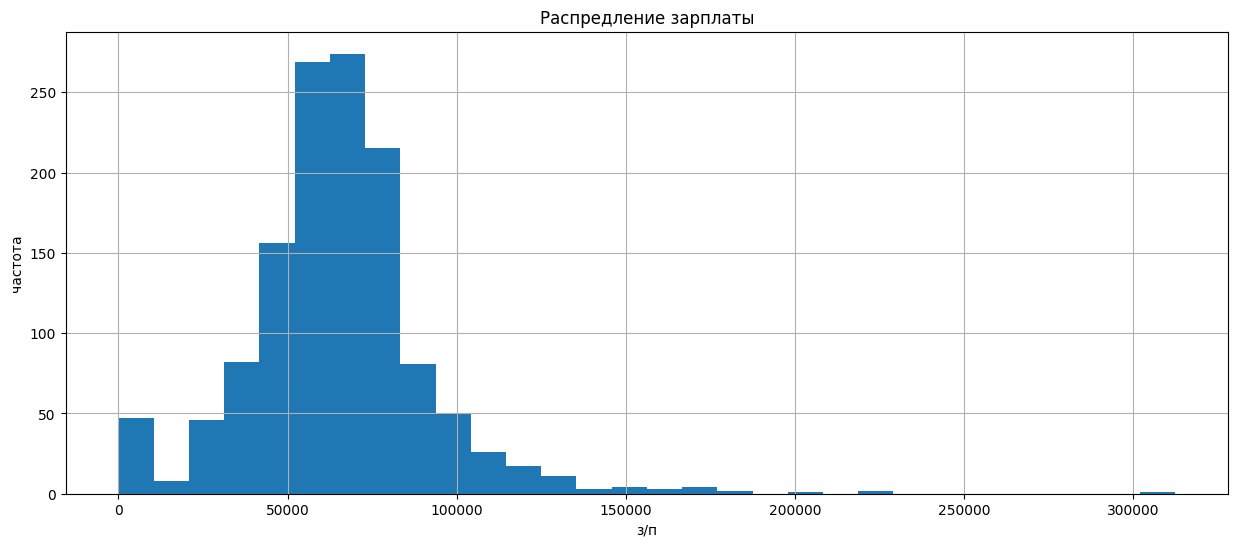

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 6))
df_encoded['salary'].hist(bins = 30)
plt.title('Распредление зарплаты')
plt.xlabel('з/п')
plt.ylabel('частота')
plt.show()

Очистим датасет от выбросов (з/п > 150000). Есть предположение, что для такх вакансий есть какой-то отдельныйнабор наывыков и обязанностей. Также удалим выбросы около 0 (скорее всего там з/п просто некорректно указано)

In [14]:
df_encoded['salary'] = df_encoded['salary'].astype(float)
df_encoded = df_encoded.loc[(df_encoded['salary'] <= 150000) & (df_encoded['salary'] >= 20000)]

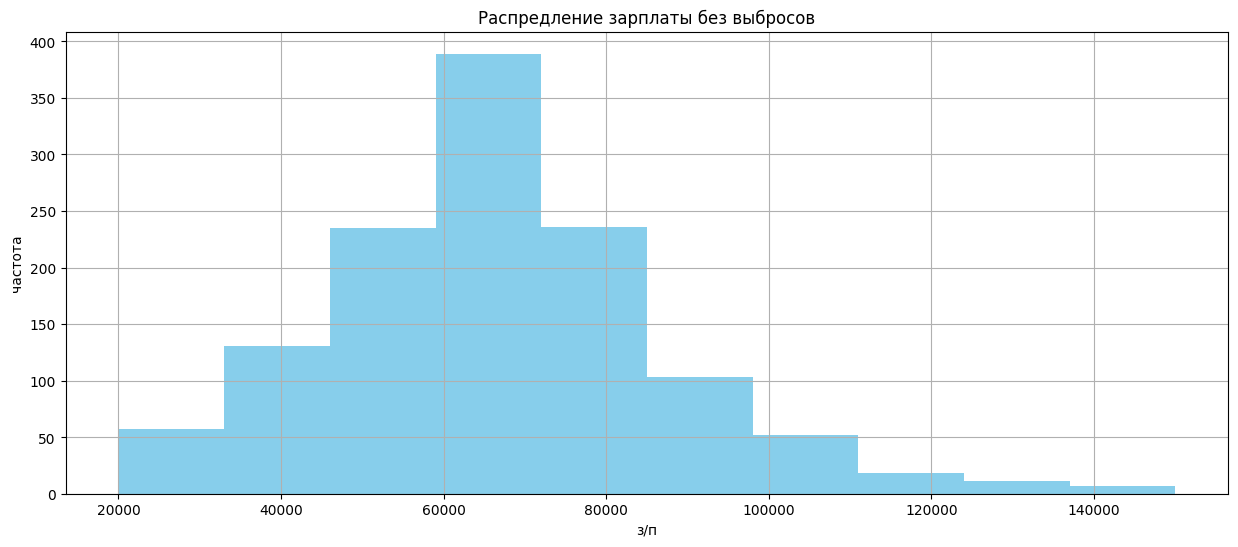

In [15]:
plt.figure(figsize = (15, 6))
df_encoded['salary'].hist(bins = 10, color = 'skyblue')
plt.title('Распредление зарплаты без выбросов')
plt.xlabel('з/п')
plt.ylabel('частота')
plt.show()

Создадим список 10 самых популярных навыков и проверим будет ли отличаться распределение з/п для вакансий, где они присутствуют

In [16]:
top_skills = []
for i, j in skills_dict.items():
    if (len(top_skills) < 10) : top_skills.append(i)
    else: break

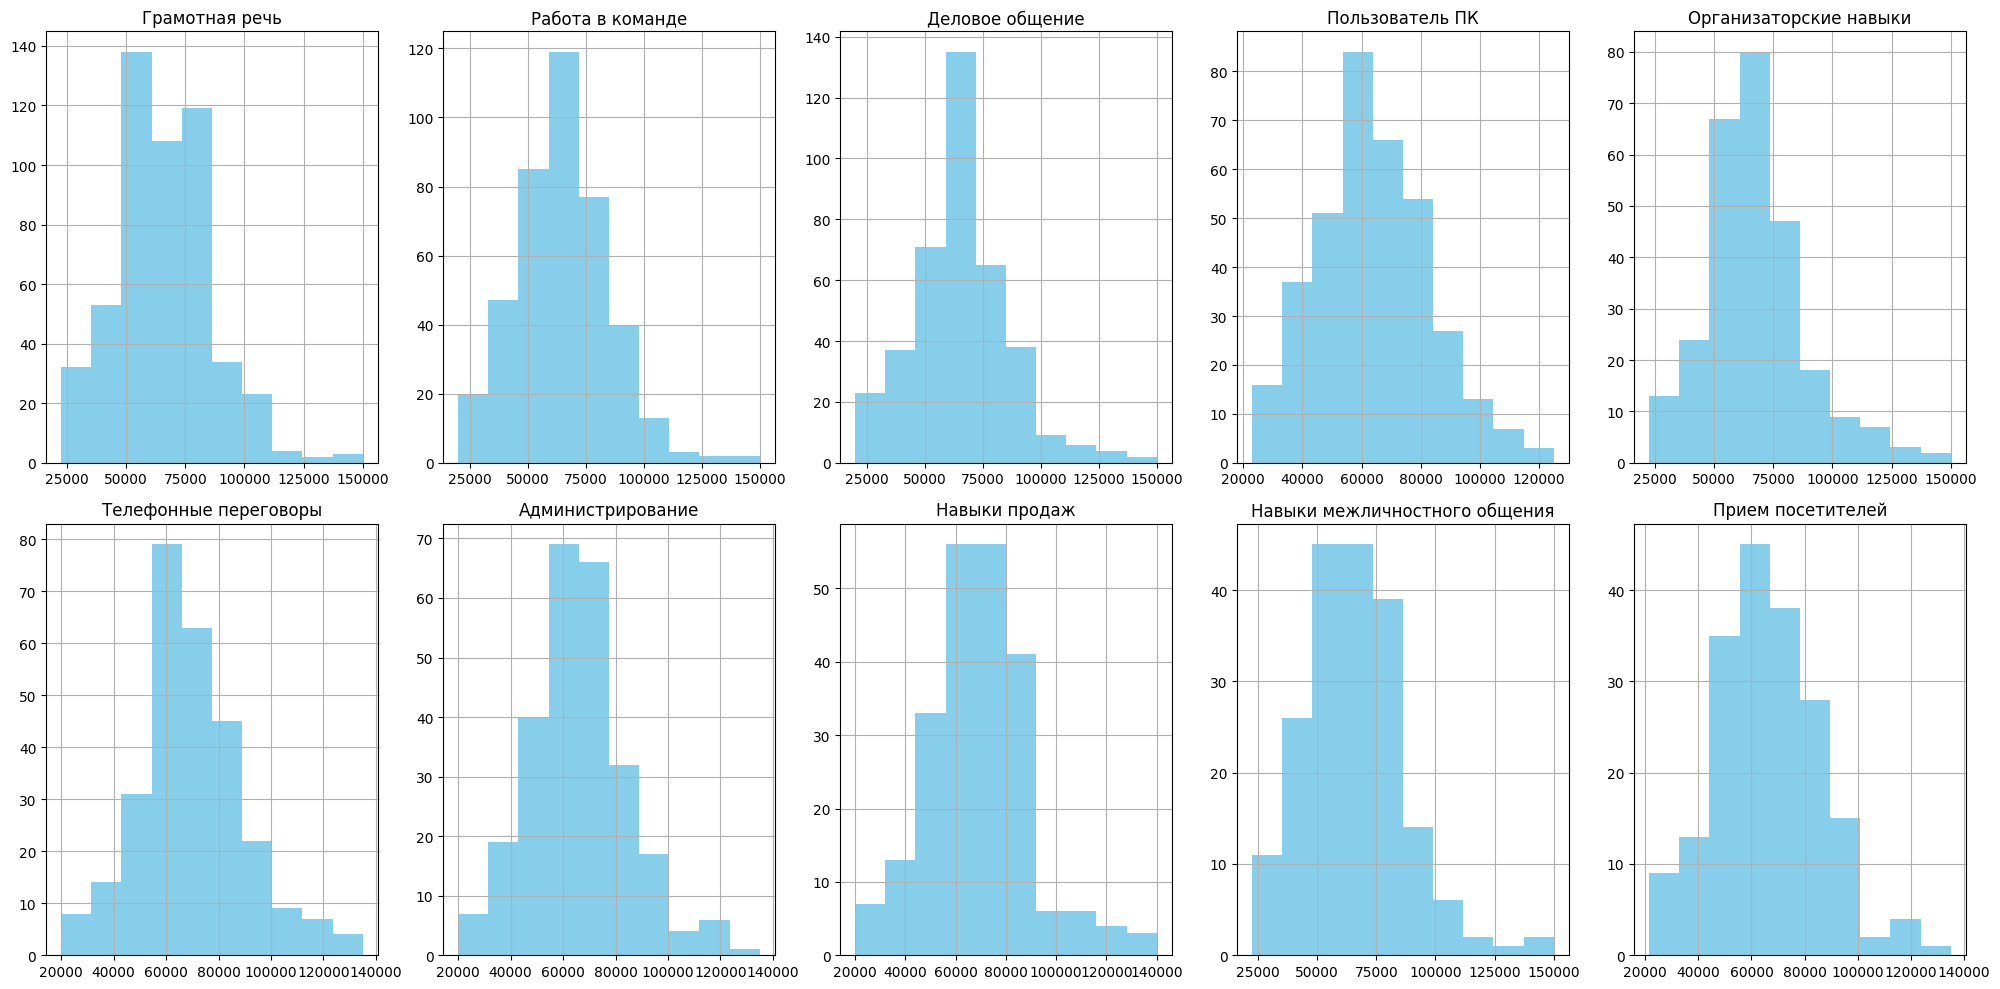

In [17]:
import matplotlib.pyplot as plt

#хочу чтобы гистограммы были на 2 строках и их было удобнее сравнивать
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, skill in enumerate(top_skills):
    #номер строки и столбца для диаграммы
    row = i // 5 
    col = i % 5
    #создаем df где будут только вакансии, для которых нужен выбранный скилл
    df_plt = df_encoded.loc[df_encoded[skill] == 1]
    #рисуем для него распределение
    df_plt['salary'].hist(bins=10, color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(skill)
    
plt.tight_layout()
plt.show()

Наше предположение не оправдалось, вакансии с использованием популярных навыков имеют примерно такое же распределение з/п как и выборка всех вакансий Администратора (популярные признаки не отражают разницу в з/п). При этом несмотря на сужение выборки распределение з/п остается похожим на нормальное

Теперь проверим зависимость количества навыков в вакансии и з/п

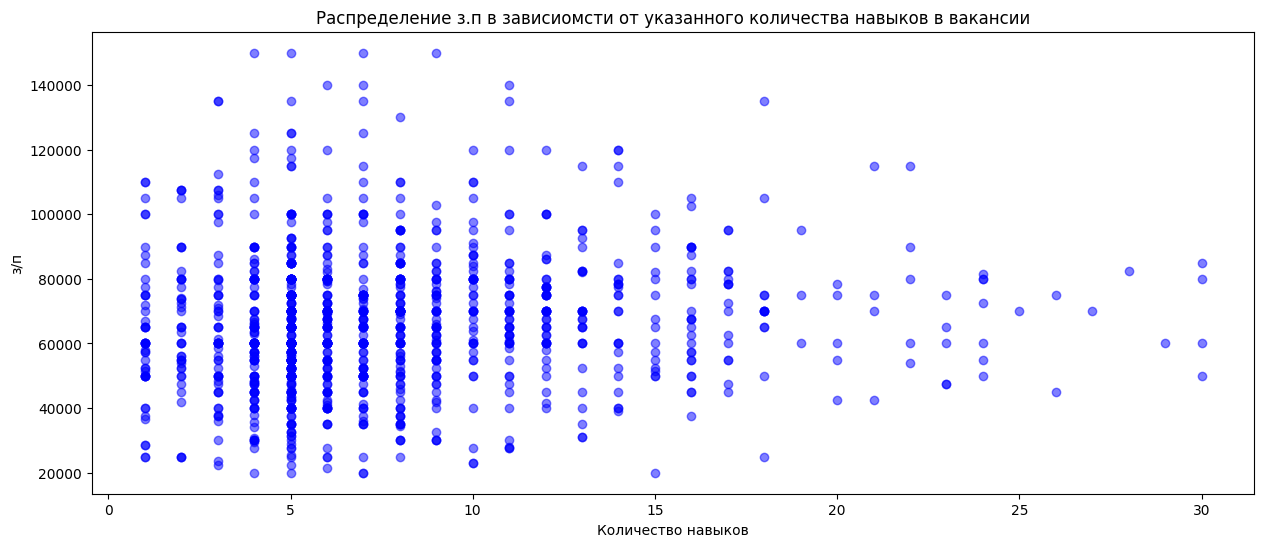

In [18]:
plt.figure(figsize= (15,6))
plt.scatter(df_encoded['cnt_skills'], df_encoded['salary'], color = 'blue', alpha = 0.5)
plt.title('Распределение з/п в зависиомсти от указанного количества навыков в вакансии')
plt.xlabel('Количество навыков')
plt.ylabel('з/п')
plt.show()

Также есть вероятность что администраторы разных учреждений по разному получают. Давайте проверим и этот признак

In [24]:
df_encoded['name'].nunique()
name_dict = dict()
for i in df_encoded['name']:
    if i in name_dict: name_dict[i] += 1
    else: name_dict[i] = 1
name_dict = dict(sorted(name_dict.items(), key = lambda x: x[1], reverse = True))
name_dict

{'Администратор': 226,
 'Администратор салона красоты': 106,
 'Администратор стоматологической клиники': 41,
 'Администратор медицинского центра': 22,
 'Администратор клиники': 21,
 'Администратор-кассир': 17,
 'Администратор фитнес-клуба': 13,
 'Администратор в салон красоты': 13,
 'Администратор гостиницы': 12,
 'Менеджер-администратор': 12,
 'Старший администратор': 11,
 'Администратор в стоматологию': 9,
 'Администратор отеля': 9,
 'Администратор в офис': 9,
 'Администратор стоматологии': 8,
 'Администратор ресепшен': 7,
 'Администратор офиса': 7,
 'Администратор в стоматологическую клинику': 6,
 'Администратор на ресепшен': 6,
 'Администратор магазина': 6,
 'Администратор косметологической клиники': 5,
 'Администратор медицинской клиники': 5,
 'Помощник администратора': 5,
 'Администратор в клинику': 5,
 'Администратор студии маникюра': 5,
 'Администратор салона': 5,
 'Администратор в медицинский центр': 4,
 'Администратор фитнес-центра': 4,
 'Кассир-администратор': 4,
 'Администр

Сделаем аналогично скиллам - построим распределение з/п топ-10 видов администраторов

In [25]:
top_names = []
for i, j in name_dict.items():
    if (len(top_names) < 10) : top_names.append(i)
    else: break

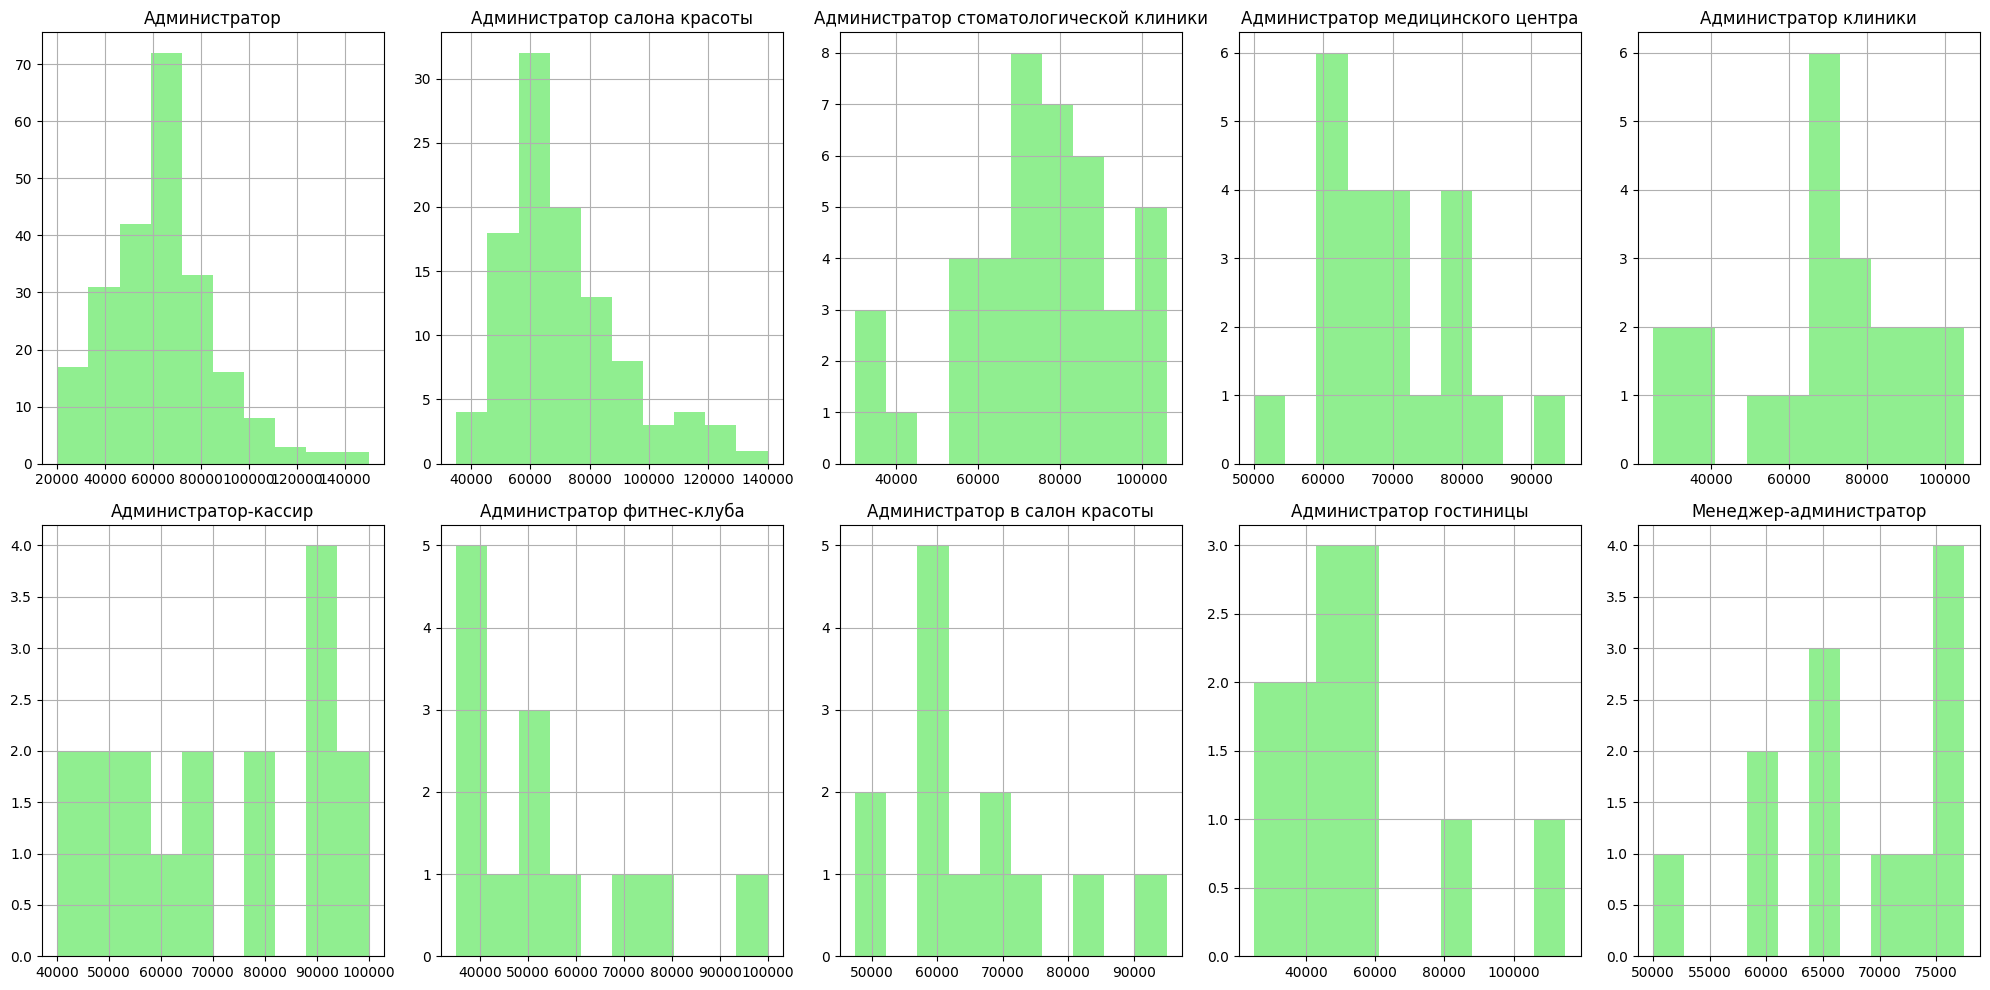

In [27]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, name in enumerate(top_names):
    row = i // 5 
    col = i % 5
    #создаем df где будут только вакансии c нужным названием
    df_plt = df_encoded.loc[df_encoded['name'] == name]
    #рисуем для него распределение
    df_plt['salary'].hist(bins=10, color='lightgreen', ax=axes[row, col])
    axes[row, col].set_title(name)
    
plt.tight_layout()
plt.show()

In [28]:
import plotly.io as pio
pio.renderers.default = 'notebook'

Из распределений видно, что разные администраторы имеют примерно одну моду з/п 60-70к. При этом выбиваются только распределения з/п Менеджеров-администраторов и Администраторов-кассиров. Это происходит скорее всего из-за того, что у них есть дополнительный функции. Однако это скорее интересное наблюдение, чем что-то что может пригодится для прогнозирования з/п. Тут скорее нужно было убедиться в однородности вакансий.

Из графика видно, что строгой зависимости или корреляции между признаком и целевой переменной нет. Если обучать на этоп признаке линейную регрессию то скорее всего он просто будет выдавать вершину распределение з/п - такая модель будет не очень информативна

### Для промежуточного чекпойнта: 
Целью моего проекта является сделать модель, которая предсказывает твою з/п (ту, которую может предложить рынок) или хотя бы "класс" этой з/п (большая/маленькая и т.д.) на основе навыков, которые есть у кандидата и проверить, что з/п вообще зависит от твоих навыков (насколько это позволяет качество вакансий на hh). Также возможно удастся найти закономерности помимо есть конкретный признак/нет конкретного признака в данных и также использовать их для улучшения точности модели. 

P.S. парсинг оказался чуть сложнеее чем я думал, поэтому визуализации на данный момент не окончательные и могут изменится к финальному дл + возможно обогащене датасета парсингом новых признаков